In [4]:

import numpy as np
import pandas as pd

from qubo_util import *
from dwave_qbsolv import QBSolv


In [20]:
### Lets define the basics

bend = [0, 1, 2]
weld = [3, 4]
paint =  [5]

bend_length = 2
weld_length = 3
paint_length = 6

t_step = 3
t_step_in_sec = 30

In [5]:
np.set_printoptions(suppress=True)

### Jobs sorted by Complexity:  10, 20, 50, 100, 500, 1k, 5k

### 10

In [87]:
jobs = [(0, 0, 1, 2, 1, 3),
 (1, 0, 0, 2, 0, 1)]

In [88]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 420 second(s).
Which is equal to: 14 time steps.




In [89]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 12



In [90]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,2,6,6,18
1,1,0,0,6,0,6


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 0.5996890068054199
INFO: objective = 14.0
[(bend1, BendMachine2, 0, 2), (weld2, WeldMachine2, 0, 6), (weld1, WeldMachine1, 2, 8), (paint1, PaintMachine, 8, 14), (MakeSpan, BendMachine1, 14, 15)]


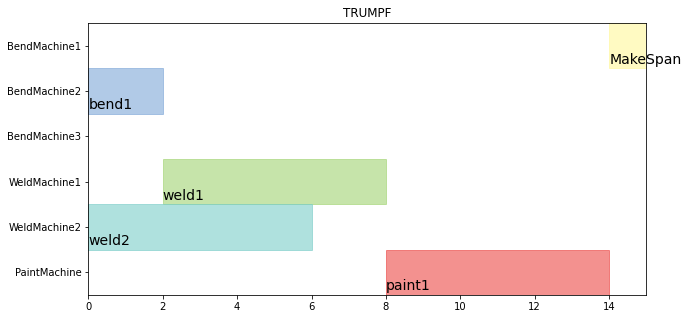

In [85]:
#Classic for 10

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, weld2  = S.Task('bend1',2), S.Task('weld1',6), S.Task('paint1',6), S.Task('weld2',6)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 20

In [91]:
jobs = [(0, 0, 1, 1, 2, 3),
 (1, 0, 0, 2, 0, 1)]

In [92]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 600 second(s).
Which is equal to: 20 time steps.




In [93]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 22



In [94]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,2,3,12,18
1,1,0,0,6,0,6


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 0.5809211730957031
INFO: objective = 17.0
[(bend1, BendMachine3, 0, 2), (weld2, WeldMachine2, 0, 6), (weld1, WeldMachine1, 2, 5), (paint1, PaintMachine, 5, 17), (MakeSpan, BendMachine1, 17, 18)]


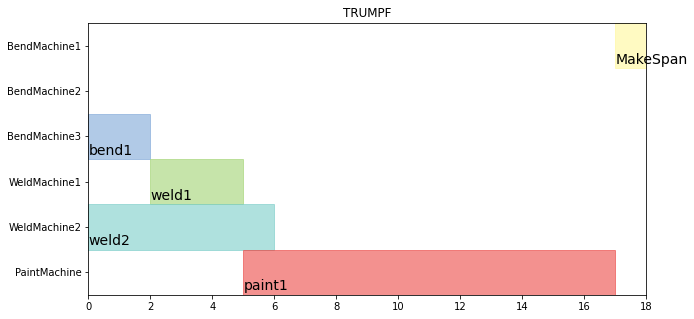

In [80]:
#Classic for 20

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, weld2  = S.Task('bend1',2), S.Task('weld1',3), S.Task('paint1',12), S.Task('weld2',6)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 50

In [128]:
jobs = [(0, 0, 1, 1, 2, 3),
 (1, 0, 2, 3, 0, 3)]

In [129]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 810 second(s).
Which is equal to: 27 time steps.




In [130]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 49



In [131]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,2,3,12,18
1,1,0,4,9,0,18


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 0.7804708480834961
INFO: objective = 17.0
[(bend1, BendMachine1, 0, 2), (bend2, BendMachine3, 0, 4), (weld1, WeldMachine2, 2, 5), (paint1, PaintMachine, 5, 17), (weld2, WeldMachine1, 5, 14), (MakeSpan, BendMachine1, 17, 18)]


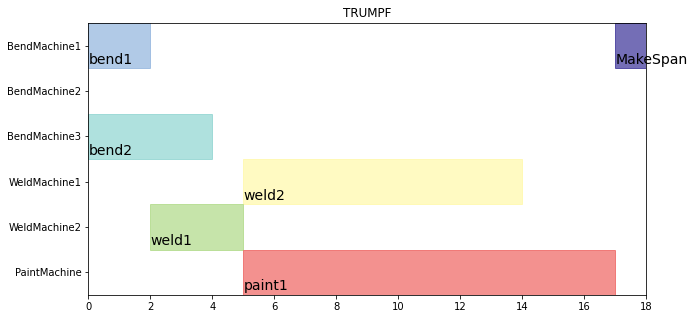

In [132]:
#Classic for 50

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2  = S.Task('bend1',2), S.Task('weld1',3), S.Task('paint1',12), S.Task('bend2',4), S.Task('weld2',9)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 100

In [149]:
jobs = [(0, 0, 4, 3, 6, 9),
 (1, 0, 2, 6, 0, 4)]

In [150]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 1980 second(s).
Which is equal to: 66 time steps.




In [151]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 105



In [152]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,8,9,36,54
1,1,0,4,18,0,24


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 0.8674478530883789
INFO: objective = 53.0
[(bend1, BendMachine2, 0, 8), (bend2, BendMachine1, 0, 4), (weld2, WeldMachine2, 6, 24), (weld1, WeldMachine1, 8, 17), (paint1, PaintMachine, 17, 53), (MakeSpan, BendMachine1, 53, 54)]


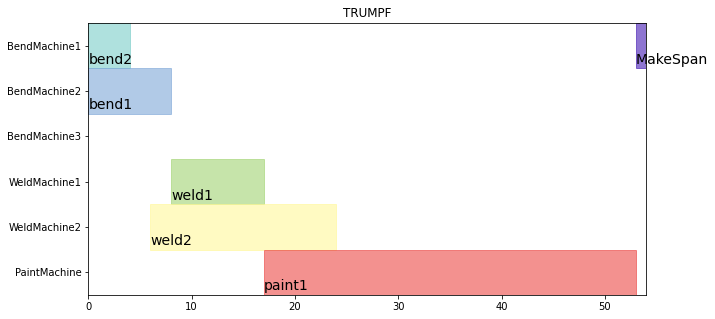

In [59]:
#Classic for 100

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2  = S.Task('bend1',8), S.Task('weld1',9), S.Task('paint1',36), S.Task('bend2',4), S.Task('weld2',18)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 500

In [161]:
jobs = [(0, 0, 3, 12, 8, 20),
 (1, 0, 5, 9, 0, 10),
 (1, 1, 9, 4, 5, 10)]

In [162]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 4530 second(s).
Which is equal to: 151 time steps.




In [163]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 507



In [164]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,6,36,48,120
1,1,0,10,27,0,60
2,1,1,18,12,30,60


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 1.3055789470672607
INFO: objective = 108.0
[(bend1, BendMachine3, 0, 6), (bend2, BendMachine1, 0, 10), (bend3, BendMachine2, 0, 18), (weld1, WeldMachine1, 11, 47), (weld3, WeldMachine2, 18, 30), (paint3, PaintMachine, 30, 60), (paint1, PaintMachine, 60, 108), (weld2, WeldMachine2, 75, 102), (MakeSpan, BendMachine1, 108, 109)]


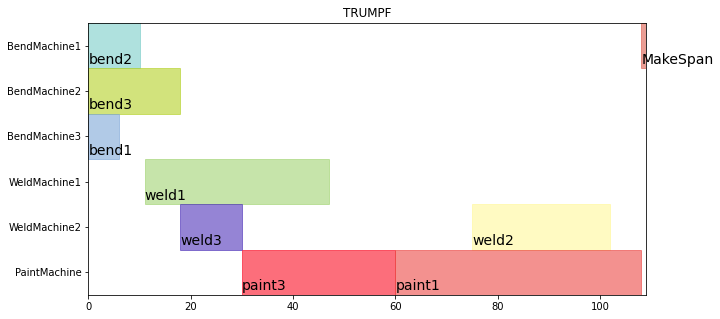

In [165]:
#Classic for 500

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2, bend3, weld3, paint3  = S.Task('bend1',6), S.Task('weld1',36), S.Task('paint1',48), S.Task('bend2',10), S.Task('weld2',27), S.Task('bend3',18), S.Task('weld3',12), S.Task('paint3',30)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2
S += bend3< weld3, weld3 <paint3


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3
S += bend3 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2
S += weld3 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine

S += paint3% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 1k

In [186]:
jobs = [(0, 0, 1, 12, 8, 18),
 (1, 0, 5, 9, 0, 13),
 (1, 1, 9, 1, 5, 13),
 (2, 0, 1, 9, 3, 20)]

In [187]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 5550 second(s).
Which is equal to: 185 time steps.




In [188]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 1006



In [189]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,2,36,48,108
1,1,0,10,27,0,78
2,1,1,18,3,30,78
3,2,0,2,27,18,120


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 4.795508146286011
INFO: objective = 117.0
[(bend1, BendMachine1, 0, 2), (bend3, BendMachine2, 0, 18), (bend4, BendMachine1, 2, 4), (bend2, BendMachine1, 10, 20), (weld1, WeldMachine2, 10, 46), (weld3, WeldMachine1, 18, 21), (paint3, PaintMachine, 21, 51), (weld4, WeldMachine1, 21, 48), (paint1, PaintMachine, 51, 99), (weld2, WeldMachine1, 68, 95), (paint4, PaintMachine, 99, 117), (MakeSpan, BendMachine1, 117, 118)]


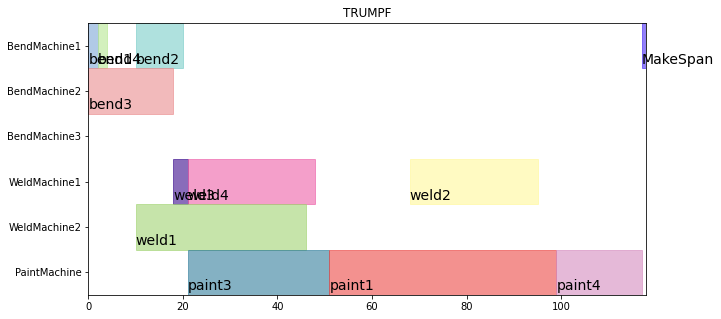

In [43]:
#Classic for 1K

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2, bend3, weld3, paint3, bend4, weld4, paint4  = S.Task('bend1',2), S.Task('weld1',36), S.Task('paint1',48), S.Task('bend2',10), S.Task('weld2',27), S.Task('bend3',18), S.Task('weld3',3), S.Task('paint3',30), S.Task('bend4',2), S.Task('weld4',27), S.Task('paint4',18)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2
S += bend3< weld3, weld3 <paint3
S += bend4< weld4, weld4 <paint4



##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3
S += bend3 % BendMachine1|BendMachine2|BendMachine3
S += bend4 % BendMachine1|BendMachine2|BendMachine3




#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2
S += weld3 % WeldMachine1|WeldMachine2
S += weld4 % WeldMachine1|WeldMachine2




#Painting
S += paint1% PaintMachine

S += paint3% PaintMachine
S += paint4% PaintMachine






# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

### 5k

In [202]:
jobs = [(0, 0, 1, 12, 8, 18),
 (1, 0, 5, 9, 0, 13),
 (1, 1, 9, 1, 5, 13),
 (2, 0, 1, 9, 3, 20),
 (3, 0, 4, 14, 3, 35),
 (3, 1, 1, 11, 0, 35),
 (4, 0, 5, 4, 6, 32),
 (4, 1, 9, 13, 6, 32)]

In [203]:
# OrderNo, PartNo, BendingLines, WeldingPoints, PaintTime, DueDate 

m_t_steps = max_time(jobs, bend_length, weld_length, paint_length)

m_time = m_t_steps * t_step_in_sec
    
print('The maximal maketime for the given operations is: ' + str(m_time) + ' second(s).\nWhich is equal to: ' + str(m_t_steps) + ' time steps.\n\n')


The maximal maketime for the given operations is: 11550 second(s).
Which is equal to: 385 time steps.




In [204]:
operations = ops(jobs, bend, weld, paint, bend_length, weld_length, paint_length, t_step)

print('Anzahl an Kombinationen: ' + str(len(operations)) + '\n')

Anzahl an Kombinationen: 5004



In [205]:
df=pd.DataFrame(jobs, columns=['order', 'part', 'bend', 'weld', 'paint', 'deadline'])
df["bend"] = df["bend"] * 2
df["weld"] = df["weld"] * 3
df["paint"] = df["paint"] * 6
df["deadline"] = df["deadline"] * 6
df

,order,part,bend,weld,paint,deadline
0,0,0,2,36,48,108
1,1,0,10,27,0,78
2,1,1,18,3,30,78
3,2,0,2,27,18,120
4,3,0,8,42,18,210
5,3,1,2,33,0,210
6,4,0,10,12,36,192
7,4,1,18,39,36,192


/opt/miniconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 208.03144812583923
INFO: objective = 207.0
[(bend3, BendMachine3, 0, 18), (bend5, BendMachine2, 0, 8), (bend1, BendMachine1, 2, 4), (bend7, BendMachine1, 10, 20), (weld1, WeldMachine1, 15, 51), (weld3, WeldMachine2, 18, 21), (paint3, PaintMachine, 21, 51), (bend4, BendMachine1, 23, 25), (weld4, WeldMachine2, 35, 62), (bend6, BendMachine1, 37, 39), (paint1, PaintMachine, 51, 99), (weld5, WeldMachine1, 57, 99), (bend2, BendMachine1, 63, 73), (weld7, WeldMachine2, 65, 77), (bend8, BendMachine3, 69, 87), (weld2, WeldMachine2, 97, 124), (paint7, PaintMachine, 99, 135), (weld8, WeldMachine1, 101, 140), (weld6, WeldMachine2, 125, 158), (paint5, PaintMachine, 135, 153), (paint8, PaintMachine, 153, 189), (paint4, PaintMachine, 189, 207), (MakeSpan, BendMachine1, 207, 208)]


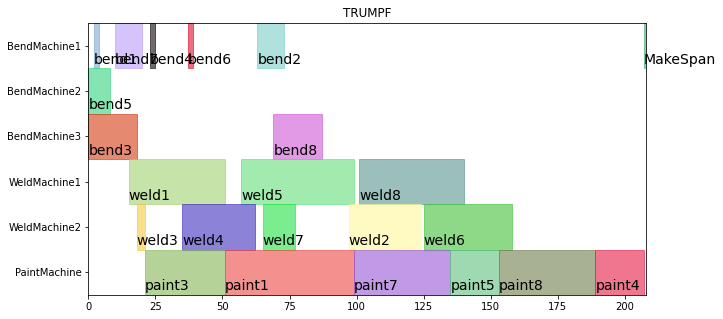

In [38]:
#Classic for 5K

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=350)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2, bend3, weld3, paint3, bend4, weld4, paint4, bend5, weld5, paint5, bend6, weld6, bend7, weld7, paint7, bend8, weld8, paint8 = S.Task('bend1',2), S.Task('weld1',36), S.Task('paint1',48), S.Task('bend2',10), S.Task('weld2',27), S.Task('bend3',18), S.Task('weld3',3), S.Task('paint3',30), S.Task('bend4',2), S.Task('weld4',27), S.Task('paint4',18), S.Task('bend5',8), S.Task('weld5',42), S.Task('paint5',18), S.Task('bend6',2), S.Task('weld6',33), S.Task('bend7',10), S.Task('weld7',12), S.Task('paint7',36), S.Task('bend8',18), S.Task('weld8',39), S.Task('paint8',36) 


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2
S += bend3< weld3, weld3 <paint3
S += bend4< weld4, weld4 <paint4
S += bend5< weld5, weld5 <paint5
S += bend6< weld6
S += bend7< weld7, weld7 <paint7
S += bend8< weld8, weld8 <paint8



##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3
S += bend3 % BendMachine1|BendMachine2|BendMachine3
S += bend4 % BendMachine1|BendMachine2|BendMachine3
S += bend5 % BendMachine1|BendMachine2|BendMachine3
S += bend6 % BendMachine1|BendMachine2|BendMachine3
S += bend7 % BendMachine1|BendMachine2|BendMachine3
S += bend8 % BendMachine1|BendMachine2|BendMachine3




#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2
S += weld3 % WeldMachine1|WeldMachine2
S += weld4 % WeldMachine1|WeldMachine2
S += weld5 % WeldMachine1|WeldMachine2
S += weld6 % WeldMachine1|WeldMachine2
S += weld7 % WeldMachine1|WeldMachine2
S += weld8 % WeldMachine1|WeldMachine2




#Painting
S += paint1% PaintMachine

S += paint3% PaintMachine
S += paint4% PaintMachine
S += paint5% PaintMachine

S += paint7% PaintMachine
S += paint8% PaintMachine






# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))